# Image Analysis

**Perez Bautista David 2016351090 3CV7**

- Practice 3 Image Algebra

# INTRODUCTION

The operation between images consists of
determine the value of a pixel P [i j] from determine the value of a pixel P [i, j] from
of the pixels P ’[i, j] and P’ ’[i, j], where P’ and P ’’
they are two different images
„Considerations
* Images of the same dimension
* Images of different dimension
* Image registration

## GRAYSCALE IMAGES
#### ADD IMAGES 
The operation add between images
consists of merging the values of 2 input images, 

    if x+y <= 255 then
    f(x,y)=x+y            
    else 
    f(x,y)=255      where x,y are image's pixels of images A and B
    
   
    other formes to fuse images is
    
    f(x,y)=(x+y)/2 
 
    f(x,y)= ax+by    where  a+b=1

#### SUBSTRACTION IMAGES 
The operation substraction between images
consists of substract the values of   2 input images, 
There are differents models.

<img src="resta.png" alt="header" style="height:90px;">


#### MULTIPLICATION IMAGES
The multiplication between images gives as
result the fusion of two images result the fusion of two images in where:
 
    f(x,y)= k*x*y 
    x,y are image's pixels of images A and B
    k=(1/255) is a multiplication factor


## BINARY IMAGES
In this case the values of pixels only are 0 ot 1, and and we operate these values like sets 

  #### UNION IMAGES
  This operation fuse the images.
 
  f(x,y)=x or y 
  where x,y are image's pixels of images A and
  
  #### INTERSECTION IMAGES
  This operation get image that have the pixels  on common between two images.
  
  f(x,y)=x and y 
  where x,y are image's pixels of images A and
 
  #### COMPLEMENT IMAGES
  This operation inverse the value of the pixels, 0 to 255 or 255 to 0.
  
  f(x)=not(x)
  
  #### CONVOLUTION IMAGES
  This operation is based in the discrete convolution, the convolution mask and image can to taked like 
  discret signals. The result is according to convolution mask.We can to get the intern or extern borders of
  the figures in the image.
  
  <img src="convolution.png" alt="header" style="height:90px;">
  
  
  

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from timeit import timeit
%matplotlib inline
from PIL import Image
%reload_ext Cython

**Using PIL and matplotlib to read and display images.**

In [2]:
filepath="./" #The current directory
afilename="a.jpg" 
bfilename="b.JPEG"
#afilename="cocos.jpeg" 
#bfilename="test.JPEG"


pic_A=Image.open(filepath+afilename)
pic_B=Image.open(filepath+bfilename)
#plt.imshow(pic) #Diplays the image in the notebook
#image_format=pic_A.format


In [3]:
pic_arr = np.asarray(pic_A) #converts the image to an Numpy Array
pic_arr.shape #(height,width,#of channels)
print("The height value is: ",pic_arr.shape[0]," ")
print("The weight value is: ",pic_arr.shape[1]," ")


The height value is:  489  
The weight value is:  734  


In [4]:
pic_arr2 = np.asarray(pic_B) #converts the image to an Numpy Array
pic_arr2.shape #(height,width,#of channels)
print("The height value is: ",pic_arr2.shape[0]," ")
print("The weight value is: ",pic_arr2.shape[1]," ")

The height value is:  489  
The weight value is:  734  


**IMAGES ADD,SUBSTRACTION AND MULTIPLICATION**

In [5]:
%%cython
import numpy as np
def new_picture(const int new_height,const int new_width,const int channels):
    cdef int i
    cdef unsigned char [:,:,:] aux
    cdef unsigned char [:,:,:] new_pic
    aux1=np.zeros((new_height,new_width),dtype=np.uint8)
    aux=aux1[:,:,np.newaxis]
    
    new_pic1=np.zeros((new_height,new_width),dtype=np.uint8)
    new_pic=new_pic1[:,:,np.newaxis]
    
    for i in range(0,channels-1):
        new_pic=np.append(new_pic,aux,axis=2)     
     
    new_picture=np.asarray(new_pic)
    return new_picture

#
#
def Add(const unsigned char [:,:,:] A,const unsigned char [:,:,:] B):
    cdef new_image=new_picture(A.shape[0],A.shape[1],A.shape[2])
    cdef int i
    cdef int j
    cdef float value
    cdef int channel

    for channel in range(0,3):
        for i in range(0,A.shape[0]):
            for j in range(0,A.shape[1]):
                value=0.5*A[i,j,channel]+B[i,j,channel]*0.5
                if value>255:
                    new_image[i,j,channel]=np.uint8(255)
                else:
                    new_image[i,j,channel]=np.uint8(value)
    return new_image



def Substraction(const unsigned char [:,:,:] A,const unsigned char [:,:,:] B):
    cdef new_image=new_picture(A.shape[0],A.shape[1],A.shape[2])
    cdef int i
    cdef int j
    cdef float value
    cdef int channel

    for channel in range(0,3):
        for i in range(0,A.shape[0]):
            for j in range(0,A.shape[1]):
                value=(255/2)+(A[i,j,channel]-B[i,j,channel])/2
                if value<0:
                    new_image[i,j,channel]=np.uint8(0)
                else:
                    new_image[i,j,channel]=np.uint8(value)
    return new_image


def Multiplication(const unsigned char [:,:,:] A,const unsigned char [:,:,:] B):
    cdef new_image=new_picture(A.shape[0],A.shape[1],A.shape[2])
    cdef int i
    cdef int j
    cdef float value
    cdef int channel

    for channel in range(0,3):
        for i in range(0,A.shape[0]):
            for j in range(0,A.shape[1]):
                value=(1/255)*A[i,j,channel]*B[i,j,channel]
                if value>255:
                    new_image[i,j,channel]=np.uint8(255)
                else:
                    new_image[i,j,channel]=np.uint8(value)
    return new_image


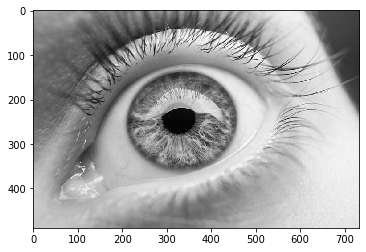

In [6]:
plt.imshow(pic_A)

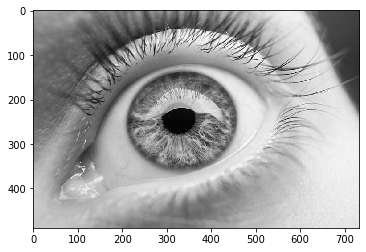

In [7]:
plt.imshow(pic_A)

CPU times: user 1.25 s, sys: 967 µs, total: 1.25 s
Wall time: 1.24 s


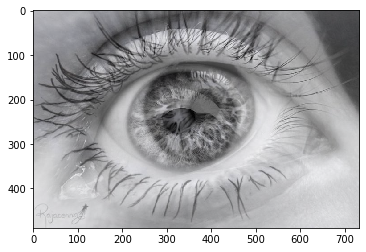

In [8]:
%%time
new_image=Add(pic_arr,pic_arr2)
plt.imshow(new_image)

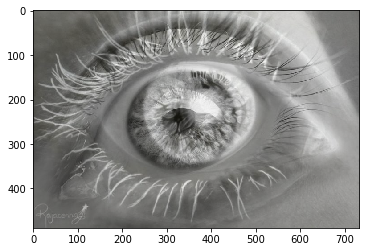

In [9]:
new_image1=Substraction(pic_arr,pic_arr2)
plt.imshow(new_image1)

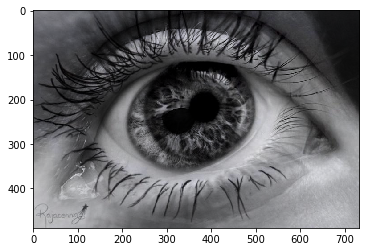

In [10]:
new_image2=Multiplication(pic_arr,pic_arr2)
plt.imshow(new_image2)

**BYNARY IMAGES**

In [11]:
filepath="./" #The current directory
#binfilename="apple3.JPEG" 
binfilename="coinst.PNG" 
bin2filename="apple4.PNG"

pic_bin=Image.open(filepath+binfilename)
pic_bin2=Image.open(filepath+bin2filename)

_bin = np.asarray(pic_bin) #converts the image to an Numpy Array

#print("The height value is: ",_bin.shape[0]," ")
#print("The weight value is: ",_bin.shape[1]," ")

_bin2 = np.asarray(pic_bin2) #converts the image to an Numpy Array

#print("The height value is: ",_bin2.shape[0]," ")
#print("The weight value is: ",_bin2.shape[1]," ")

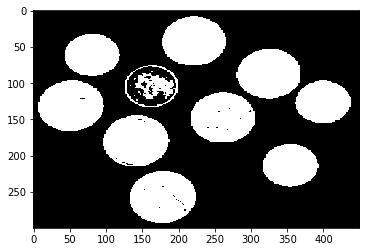

In [12]:
plt.imshow(_bin)


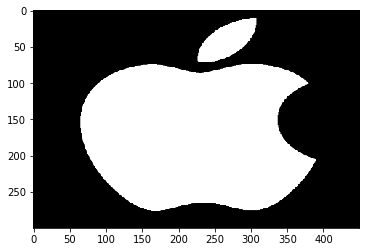

In [13]:
plt.imshow(_bin2)

**UNION, INTERSECTION AND COMPLEMENT**

In [14]:
%%cython 
import numpy as np

def new_picture(const int new_height,const int new_width,const int channels):
    cdef int i
    cdef unsigned char [:,:,:] aux
    cdef unsigned char [:,:,:] new_pic
    aux1=np.zeros((new_height,new_width),dtype=np.uint8)
    aux=aux1[:,:,np.newaxis]
    
    new_pic1=np.zeros((new_height,new_width),dtype=np.uint8)
    new_pic=new_pic1[:,:,np.newaxis]
    
    for i in range(0,channels-1):
        new_pic=np.append(new_pic,aux,axis=2)     
     
    new_picture=np.asarray(new_pic)
    return new_picture

def Substraction(const unsigned char [:,:,:] A,const unsigned char [:,:,:] B):
    cdef new_image=new_picture(A.shape[0],A.shape[1],A.shape[2])
    cdef int i
    cdef int j
    cdef int channel

    for channel in range(0,3):
        for i in range(0,A.shape[0]):
            for j in range(0,A.shape[1]):
                value=(255/2)+(A[i,j,channel]-B[i,j,channel])/2
                if value<0:
                    new_image[i,j,channel]=np.uint8(0)
                else:
                    new_image[i,j,channel]=np.uint8(value)
    return new_image

def Union(const unsigned char [:,:,:] A,const unsigned char [:,:,:] B):
    cdef new_image=new_picture(A.shape[0],A.shape[1],A.shape[2])
    cdef int i
    cdef int j
    cdef int channel

    if A.shape[2]==4:
        new_image[:,:,3]=np.asarray(A[:,:,3])
        
    for channel in range(0,3):
        for i in range(0,A.shape[0]):
            for j in range(0,A.shape[1]):
                new_image[i,j,channel]=A[i,j,channel]|B[i,j,channel]                 
    return new_image


def Intersection(const unsigned char [:,:,:] A,const unsigned char [:,:,:] B):
    cdef new_image=new_picture(A.shape[0],A.shape[1],A.shape[2])
    cdef int i
    cdef int j
    cdef int channel
    
    if A.shape[2]==4:
        new_image[:,:,3]=np.asarray(A[:,:,3])
        
    for channel in range(0,3):
        for i in range(0,A.shape[0]):
            for j in range(0,A.shape[1]):
                new_image[i,j,channel]=(A[i,j,channel]&B[i,j,channel])   
    return new_image

def Complement(const unsigned char [:,:,:] A):
    new_image=new_picture(A.shape[0],A.shape[1],A.shape[2])
    if A.shape[2]==4:
        new_image[:,:,3]=np.asarray(A[:,:,3])
        
    for channel in range(0,3):
        for i in range(0,A.shape[0]):
            for j in range(0,A.shape[1]):
                new_image[i,j,channel]=A[i,j,channel]^np.uint8(255)  
    return new_image

def Complement2(const unsigned char [:,:,:] A):
    cdef new_image=new_picture(A.shape[0],A.shape[1],A.shape[2])
    cdef int i
    cdef int j
    cdef int channel
    
    for channel in range(0,1):
        for i in range(0,A.shape[0]):
            for j in range(0,A.shape[1]):
                new_image[i,j]=A[i,j]^np.uint8(255)              
    return new_image


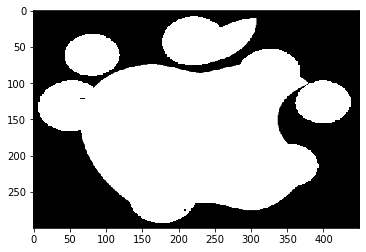

In [15]:
union_=Union(_bin,_bin2)
plt.imshow(union_)

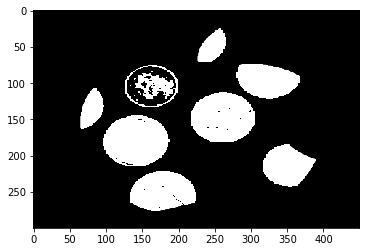

In [16]:
intersection_=Intersection(_bin,_bin2)
plt.imshow(intersection_)

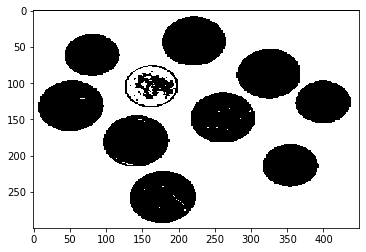

In [17]:
complement_=Complement(_bin)
plt.imshow(complement_)

**Convolution**

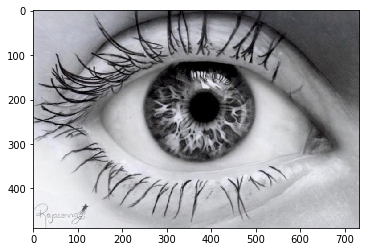

In [44]:
filepath="./" #The current directory
#binfilename="a1.jpeg" 
binfilename="b.JPEG"
bin2filename="apple4.PNG"

pic_bin=Image.open(filepath+binfilename)
pic_bin2=Image.open(filepath+bin2filename)

pic_conv=np.asarray(pic_bin)
pic_conv2=np.asarray(pic_bin2)
plt.imshow(pic_conv)

In [47]:
f=np.array([[0, 0, 0, 0, 0],
            [0,10,10,10, 0],
            [0,10,10,10, 0],
            [0,10,10,10, 0],
            [0, 0, 0, 0, 0]        
           ])
#Introducir mascara  invertida
maskconv=np.array([[0,-1],
                   [-1,2]])

maskconv1=np.array([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1]
                   ])

maskconv2=np.array([-1, 1]).reshape((2,1))

maskconv3=np.array([-1,2,-1])

origin=np.array([0,1], dtype=np.uint8);
#new_array=framework_zeros(maskconv1,origin,f)

In [32]:
%%cython
import math
import numpy as np
cimport numpy as np
def New_picture(const int new_height,const int new_width,const int channels):
    cdef int i
    cdef unsigned char [:,:,:] aux
    cdef unsigned char [:,:,:] new_pic
    aux1=np.zeros((new_height,new_width),dtype=np.uint8)
    new_picture=aux1
    if(channels>1):
        aux=aux1[:,:,np.newaxis]
        new_pic1=np.zeros((new_height,new_width),dtype=np.uint8)
        new_pic=new_pic1[:,:,np.newaxis]
        for i in range(0,channels-1):
            new_pic=np.append(new_pic,aux,axis=2)
        new_picture=np.asarray(new_pic)  
    return new_picture

def framework_zeros(np.ndarray mask,const unsigned char [:] origin,const unsigned char [:,:] array):
    cdef int addheight
    cdef int addwidth
    cdef np.ndarray new_picture
    
    if mask.ndim==1:
        addwidth=math.ceil((mask.shape[0]-origin[1])/2)
        new_picture=np.zeros((array.shape[0],array.shape[1]+addwidth*2))
        new_picture[0:array.shape[0]+1,addwidth:array.shape[1]+1]=np.asarray(array)
    else: 
        addheight=math.ceil((mask.shape[0]-origin[0])/2)
        addwidth=math.ceil((mask.shape[1]-origin[1])/2)
        if mask.shape[1]==1:
            addwidth=0
        new_picture=np.zeros((array.shape[0]+addheight*2,array.shape[1]+addwidth*2))
        new_picture[addheight:array.shape[0]+1,addwidth:array.shape[1]+1]=np.asarray(array)
    return new_picture


def convolucion(np.ndarray maskconv,const unsigned char [:] origin,const unsigned char [:,:] f,const int factor):
    cdef int i,j,aux,i2,j2
    cdef new_array=framework_zeros(maskconv,origin,f)
    cdef conv_f=np.zeros((f.shape[0],f.shape[1]))

    if maskconv.ndim>1:
        for i in range (0,conv_f.shape[0]):
            for j in range (0,conv_f.shape[1]):
                aux=0
                for i2 in range(0,maskconv.shape[0]):
                    for j2 in range(0,maskconv.shape[1]):
                        aux+=new_array[i2+i,j2+j]*maskconv[i2,j2]
                if aux>255:
                    aux=255
                elif aux<0:
                    aux=0
 
                conv_f[i,j]=aux
    else:
        for i in range (0,conv_f.shape[0]):
            for j in range (0,conv_f.shape[1]):
                aux=0
                for j2 in range(0,maskconv.shape[0]):
                    aux+=new_array[i,j+j2]*maskconv[j2]
                if aux>255:
                    aux=255
                elif aux<0:
                    aux=0
                conv_f[i,j]=aux
    
    if(factor!=0):     
        for i in range(0,conv_f.shape[0]):
            for j in range (0,conv_f.shape[1]):
                conv_f[i,j]=round(conv_f[i,j]*factor)
                
    return conv_f

#--------------------------------------------------


def Image_convolution(const unsigned char [:,:,:] array, np.ndarray maskconv, const unsigned char [:] origin,const int factor): 
    cdef int c
    cdef new_picture=New_picture(array.shape[0],array.shape[1],array.shape[2])
    cdef channel=array.shape[2]
 
    if array.shape[2]==4:
        new_picture[:,:,3]=np.asarray(array[:,:,3])
        channel=3
    
    for c in range(0,channel):
        new_picture[:,:,c]=convolucion(maskconv,origin,array[:,:,c],factor)  
        
    return new_picture

CPU times: user 2.24 s, sys: 11 µs, total: 2.24 s
Wall time: 2.23 s


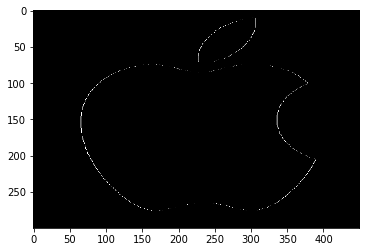

In [49]:
%%time
new_image=Image_convolution(pic_conv2,maskconv3,origin,0)
plt.imshow(new_image)

## CONCLUTIONS
Finally we have different operations for manipulate images and see characteristics of these,  the most difficult operation to programmer is the convolution, this operation is more complex than other operations in a binary images or grayscale images. In the others operations just get the pixels that to manipulated and we should to applicate some logic or arithmetic  operators in the pixel's  values.  
We can to get the internal or external borders of the figures in the image, but the time of the algorithm can be long if you programme worst the algorithm.